In [1]:
pip install scipy statsmodels scikit-learn numpy pandas matplotlib seaborn

In [28]:
from scipy.stats import ttest_rel
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
df_Model = pd.read_csv("Raw Data/IN_Model.csv")
smaller_df = pd.read_csv("Raw Data/Spread_Cleaned_IN.csv")
df_Model['Date'] = pd.to_datetime(df_Model['Date'])
smaller_df['Date'] = pd.to_datetime(smaller_df['Date'])
df = pd.merge(df_Model, smaller_df, on='Date', suffixes=('', '_smaller'))

t_stat, p_value = ttest_rel(df['Theoretical_Spread'], df['PX_SPREAD'])
print("t-statistic:", t_stat)
print("p-value:", p_value)

rmse = mean_squared_error(df['PX_SPREAD'],df['Theoretical_Spread'], squared=False)
mae = mean_absolute_error(df['PX_SPREAD'],df['Theoretical_Spread'])
print("Mean Spread:", df['PX_SPREAD'].mean()  )
print("RMSE:", rmse)
print("MAE:", mae)


t-statistic: 12.975094011410771
p-value: 7.813202758237197e-28
Mean Spread: 2.423796791443928
RMSE: 3.494107939058672
MAE: 2.811544783843066


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


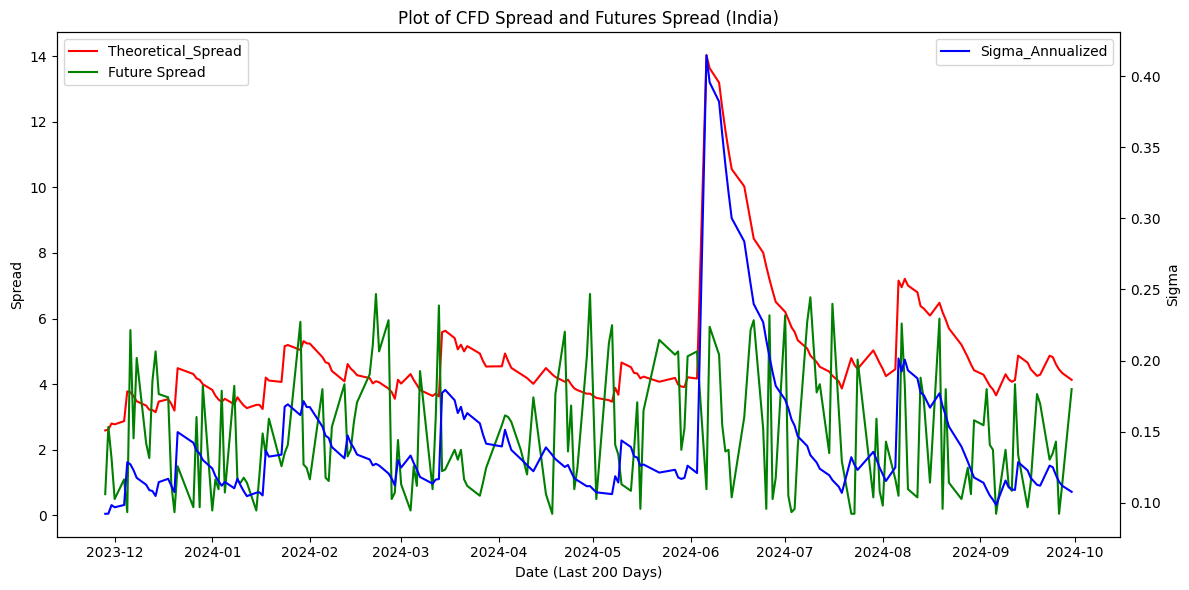

In [30]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))
plt.title('Plot of CFD Spread and Futures Spread (India)')
ax1.plot('Date', 'Theoretical_Spread', data=df,color='r', label='Theoretical_Spread', linewidth=1.5)
ax1.plot('Date', 'PX_SPREAD', data=df,color='g', label='Future Spread', linewidth=1.5)
ax1.set_xlabel("Date (Last 200 Days)")
ax1.set_ylabel("Spread")
plt.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot('Date', 'Sigma_Annualized', data=df,color='b', label='Sigma_Annualized', linewidth=1.5)
ax2.set_ylabel("Sigma")
plt.legend(loc='upper right')

fig.tight_layout()
plt.show()